In [1]:
import pandas as pd
import numpy as np # np는 matrix를 계산하는 툴
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('canada_per_income.csv')
df.head(5)

,year,per_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


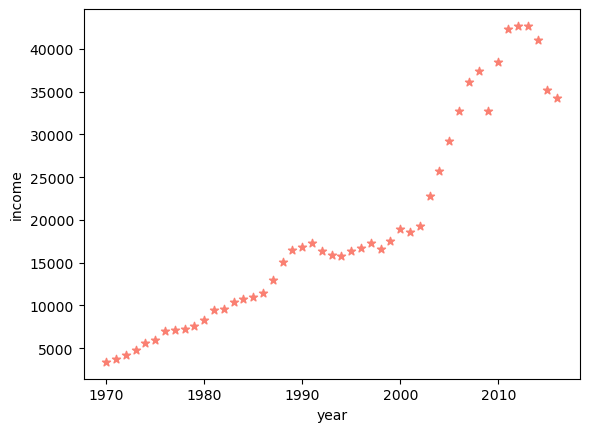

In [7]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df['per_income'],color='salmon',marker='*')

In [8]:
# df.drop 은 'per_income' 부분을 columns 통째로 드랍하고 year만 남기면서 matrix로 저장함
new_x = df.drop('per_income',axis='columns')
new_x.head(5)
# 기존의 df.year은 벡터 형식인데 새로 변수를 할당하면서 matrix 형식으로 저장되게끔 함

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [11]:
new_y = df['per_income']
new_y.head(5)
# x축은 matrix 형태, y축은 그에 해당되는 벡터로 나열되게끔 함

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per_income, dtype: float64

In [13]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_x, new_y)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [37]:
df_new = pd.read_csv('input_year.csv')
df_new.shape

(8, 1)

In [40]:
# 대괄호가 하나([2017])인 경우 자료가 벡터 형태가 되고, 두개([[2017]])인 경우 자료가 matrix 형태가 된다.
# reg.predict([[2017]])

income_cal = reg.predict(df_new)
print(income_cal)

[38803.29886875 39631.76394397 40460.22901919 41288.69409442
 42117.15916964 42945.62424486 43774.08932009 44602.55439531]


In [22]:
reg.coef_

array([828.46507522])

In [23]:
reg.intercept_

-1632210.7578554575

In [41]:
income_cal = np.round(income_cal, 2)
df_new['per_income'] = income_cal
df_new.head(5)

,year,per_income
0,2017,38803.30
1,2018,39631.76
2,2019,40460.23
3,2020,41288.69
4,2021,42117.16


In [42]:
df_new.to_csv("prediction_income.csv")